In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./RNA_DE"
cell_type1 = "Bergmann"
cell_type2 = "MLI1"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Ank2,60.033117,2.997622,0.118615,25.271874,6.511972e-141,8.483798e-137
1,Luzp2,29.918272,2.532386,0.104925,24.135187,1.068324e-128,6.959065e-125
2,Meg3,95.587493,-8.065963,0.340462,-23.691254,4.437596e-124,1.927100e-120
3,Snhg11,86.320865,-8.031672,0.361680,-22.206566,2.967693e-109,9.665776e-106
4,Qk,27.907577,3.655954,0.166402,21.970621,5.501106e-107,1.433368e-103
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


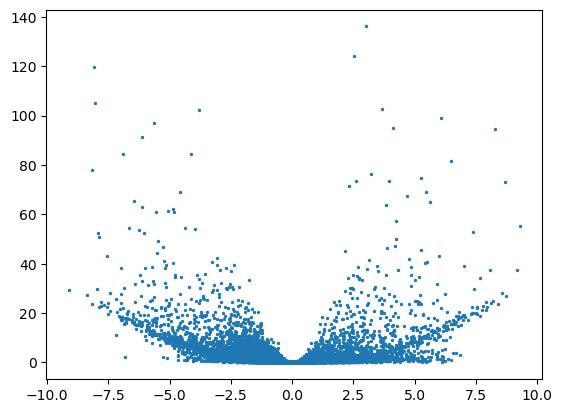

In [4]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

In [5]:
df = df[df["padj"].notna()]
p = df["padj"].values
tp = np.nanpercentile(p, 20)
tp

0.0006864788990696

# use log fold change 2 / -2 as cuttoff

In [6]:
df[(df["padj"] < tp) & (df["log2FoldChange"] > 3)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4,Qk,27.907577,3.655954,0.166402,21.970621,5.501106e-107,1.433368e-103
6,Gabrb1,16.801275,6.060182,0.281446,21.532338,7.752321e-103,1.442818e-99
8,Paqr8,5.446853,4.097792,0.194196,21.101368,7.726806e-99,1.118498e-95
9,Slc4a4,18.262110,8.295127,0.394358,21.034489,3.171685e-98,4.132071e-95
13,Wdr17,12.823518,6.466817,0.330118,19.589435,1.902918e-85,1.770801e-82
...,...,...,...,...,...,...,...
2549,Runx1,4.147887,3.468000,0.896642,3.867764,1.098379e-04,5.611641e-04
2556,Hacl1,0.339694,4.856922,1.258041,3.860701,1.130620e-04,5.760545e-04
2572,Myh6,0.274558,4.979751,1.295057,3.845198,1.204552e-04,6.099071e-04
2576,Syde2,0.320403,3.270020,0.851268,3.841354,1.223573e-04,6.185760e-04


In [7]:
df[(df["padj"] < tp) & (df["log2FoldChange"] < 3)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Ank2,60.033117,2.997622,0.118615,25.271874,6.511972e-141,8.483798e-137
1,Luzp2,29.918272,2.532386,0.104925,24.135187,1.068324e-128,6.959065e-125
2,Meg3,95.587493,-8.065963,0.340462,-23.691254,4.437596e-124,1.927100e-120
3,Snhg11,86.320865,-8.031672,0.361680,-22.206566,2.967693e-109,9.665776e-106
5,Cacna1d,16.532872,-3.812922,0.173970,-21.917059,1.786325e-106,3.878707e-103
...,...,...,...,...,...,...,...
2599,Sarnp,3.707147,-0.868022,0.227393,-3.817284,1.349288e-04,6.760968e-04
2600,Dcaf11,0.604101,-2.719067,0.712469,-3.816402,1.354118e-04,6.782564e-04
2601,B230369F24Rik,0.644114,-2.721051,0.713086,-3.815880,1.356987e-04,6.794321e-04
2602,Srgap2,13.379827,-1.063093,0.278620,-3.815572,1.358679e-04,6.800182e-04


# proceed with threshold 2 first

In [8]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Lypd6", "Gdf10"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
3317,Lypd6,0.860270,-6.806388,2.080215,-3.271964,0.001068,0.004194
4515,Gdf10,0.498673,6.376196,2.442574,2.610442,0.009043,0.026086


In [9]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < tp) & (df["log2FoldChange"] > 3)] = cell_type1
category[(df["padj"] < tp) & (df["log2FoldChange"] < -3)] = cell_type2

In [10]:
df["category"] = category
df.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54835/2314946151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = category


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Ank2,60.033117,2.997622,0.118615,25.271874,6.511972e-141,8.483798e-137,0.0
1,Luzp2,29.918272,2.532386,0.104925,24.135187,1.068324e-128,6.959065e-125,0.0
2,Meg3,95.587493,-8.065963,0.340462,-23.691254,4.437596e-124,1.927100e-120,MLI1
3,Snhg11,86.320865,-8.031672,0.361680,-22.206566,2.967693e-109,9.665776e-106,MLI1
4,Qk,27.907577,3.655954,0.166402,21.970621,5.501106e-107,1.433368e-103,Bergmann


In [11]:
df[df["gene"].isin(["Lypd6","Gdf10"])]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
3317,Lypd6,0.860270,-6.806388,2.080215,-3.271964,0.001068,0.004194,0.0
4515,Gdf10,0.498673,6.376196,2.442574,2.610442,0.009043,0.026086,0.0


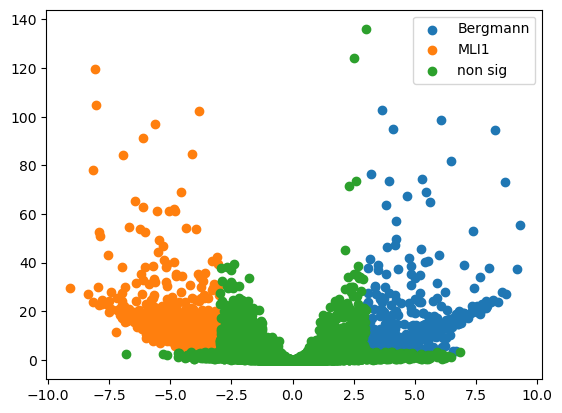

In [12]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [13]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
2,Meg3,95.587493,-8.065963,0.340462,-23.691254,4.437596e-124,1.927100e-120,MLI1
3,Snhg11,86.320865,-8.031672,0.361680,-22.206566,2.967693e-109,9.665776e-106,MLI1
4,Qk,27.907577,3.655954,0.166402,21.970621,5.501106e-107,1.433368e-103,Bergmann
5,Cacna1d,16.532872,-3.812922,0.173970,-21.917059,1.786325e-106,3.878707e-103,MLI1
6,Gabrb1,16.801275,6.060182,0.281446,21.532338,7.752321e-103,1.442818e-99,Bergmann
...,...,...,...,...,...,...,...,...
2576,Syde2,0.320403,3.270020,0.851268,3.841354,1.223573e-04,6.185760e-04,Bergmann
2577,Echdc2,0.436559,-3.028553,0.788447,-3.841162,1.224532e-04,6.188210e-04,MLI1
2583,Ckap4,0.299801,-3.624221,0.945452,-3.833321,1.264248e-04,6.374078e-04,MLI1
2592,Csrnp2,0.314887,-3.132398,0.818439,-3.827283,1.295656e-04,6.509760e-04,MLI1


# Map back to genome

In [14]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")

# Mismatch between DE gene naming and annotated namming

In [15]:
DE_sig_25kb = meta.merge(DE_genes)

In [16]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 69 gene, 0.061170212765957445 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
15,Gm3764,11.572420,3.220667,0.169961,18.949451,4.462158e-80,3.633312e-77,Bergmann
44,Dfna5,6.360832,4.208797,0.281481,14.952321,1.504147e-50,4.354673e-48,Bergmann
105,Zcchc16,6.610132,-5.639895,0.459247,-12.280753,1.149240e-34,1.412480e-32,MLI1
124,Wbscr17,10.773508,-7.959513,0.669871,-11.882154,1.465425e-32,1.527325e-30,MLI1
197,X1700047M11Rik,3.203153,8.384369,0.791689,10.590486,3.298758e-26,2.170516e-24,Bergmann
...,...,...,...,...,...,...,...,...
2264,Gm30524,0.598887,3.635686,0.879299,4.134753,3.553371e-05,2.043855e-04,Bergmann
2274,X2900055J20Rik,0.456935,-4.172450,1.010778,-4.127957,3.660004e-05,2.095936e-04,MLI1
2392,Gm28501,0.284699,3.530817,0.882272,4.001960,6.282004e-05,3.420056e-04,Bergmann
2404,Macrod2os1,0.899877,-3.233056,0.810564,-3.988650,6.645035e-05,3.598452e-04,MLI1


# OK! tried our best to get all genes

In [17]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [18]:
DE_sig_25kb.head()

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,chr1-9,chr1,3200000,3225000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1
1,chr1-10,chr1,3225000,3250000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1
2,chr1-11,chr1,3250000,3275000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1
3,chr1-12,chr1,3275000,3300000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1
4,chr1-13,chr1,3300000,3325000,Xkr4,chr1-g33,33.0,chr1-g16,16,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1


In [19]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [20]:
DE_sig_200kb = DE_sig_25kb.copy()
# Get DE norm counts
# Do not repeat count version

In [21]:
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,chr1-9,chr1,3200000,3225000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1
8,chr1-17,chr1,3400000,3425000,Xkr4,chr1-g34,34.0,chr1-g17,17,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1
16,chr1-25,chr1,3600000,3625000,Xkr4,chr1-g36,36.0,chr1-g18,18,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1
19,chr1-215,chr1,8350000,8375000,Sntg1,chr1-g83,83.0,chr1-g41,41,8.222263,-4.786163,0.369753,-12.944231,2.532881e-38,3.928377e-36,MLI1
21,chr1-217,chr1,8400000,8425000,Sntg1,chr1-g84,84.0,chr1-g42,42,8.222263,-4.786163,0.369753,-12.944231,2.532881e-38,3.928377e-36,MLI1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,chrX-6475,chrX,167600000,167625000,Frmpd4,chrX-g1676,1676.0,chrX-g838,838,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1
7679,chrX-6483,chrX,167800000,167825000,Frmpd4,chrX-g1678,1678.0,chrX-g839,839,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1
7687,chrX-6491,chrX,168000000,168025000,Frmpd4,chrX-g1680,1680.0,chrX-g840,840,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1
7695,chrX-6499,chrX,168200000,168225000,Frmpd4,chrX-g1682,1682.0,chrX-g841,841,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1


In [22]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, 
                                       "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54835/238531082.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path,


,ID,VIIa_F002.1,VIIa_M002.1,VIIa_M006.1,VIIb_F002.1,VIIb_M002.1,VIIb_M006.1,VIIc_M002.1,VIId_M002.1,VIIa_F002.8,VIIa_M002.9,VIIa_M006.9,VIIb_F002.8,VIIb_M002.7,VIIb_M006.8,VIIc_M002.8,VIId_M002.9
0,CLUSTER,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,Bergmann,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1
1,Xkr4,0.446474268089923,2.19328509705236,0.670046069041676,0,0.344197962591638,0.725993300211902,0.441406961903994,0.349535768906837,53.5948272840804,43.279884611744,61.2805288139014,41.5969990510138,49.2577139285487,53.8271418006571,59.7718668656137,62.6031475874452
2,Gm1992,0.446474268089923,0.313326442436051,0,0,0,0.181498325052975,0,0,5.62675352063836,8.41553311895023,7.47830182135745,5.25761326295341,5.61163829565745,4.61375501148489,10.3829064508343,12.0060830989621
3,Gm37381,0,0,0,0,0,0,0,0.349535768906837,0.140668838015959,0.300554754248222,0.207730606148818,0,0,0,0,0
4,Rp1,0,0,0.167511517260419,0,0,0,0.441406961903994,0,0,0,0.207730606148818,0,0,0,0,0


In [23]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')

In [24]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,Bergmann_1,Bergmann_2,Bergmann_3,Bergmann_4,Bergmann_5,Bergmann_6,Bergmann_7,Bergmann_8,MLI1_1,MLI1_2,MLI1_3,MLI1_4,MLI1_5,MLI1_6,MLI1_7,MLI1_8,Bergmann_mean,MLI1_mean
0,Xkr4,0.446474,2.193285,0.670046,0.0,0.344198,0.725993,0.441407,0.349536,53.594827,43.279885,61.280529,41.596999,49.257714,53.827142,59.771867,62.603148,0.646367,53.151514
1,Gm1992,0.446474,0.313326,0.000000,0.0,0.000000,0.181498,0.000000,0.000000,5.626754,8.415533,7.478302,5.257613,5.611638,4.613755,10.382906,12.006083,0.117662,7.424073
2,Gm37381,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.349536,0.140669,0.300555,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.043692,0.081119
3,Rp1,0.000000,0.000000,0.167512,0.0,0.000000,0.000000,0.441407,0.000000,0.000000,0.000000,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.076115,0.025966
4,Sox17,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [26]:
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,Bergmann_mean,MLI1_mean
0,chr1-9,chr1,3200000,3225000,Xkr4,chr1-g32,32.0,chr1-g16,16,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1,0.646367,53.151514
1,chr1-17,chr1,3400000,3425000,Xkr4,chr1-g34,34.0,chr1-g17,17,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1,0.646367,53.151514
2,chr1-25,chr1,3600000,3625000,Xkr4,chr1-g36,36.0,chr1-g18,18,15.790706,-6.228095,0.391038,-15.927078,4.111241e-57,1.409506e-54,MLI1,0.646367,53.151514
3,chr1-215,chr1,8350000,8375000,Sntg1,chr1-g83,83.0,chr1-g41,41,8.222263,-4.786163,0.369753,-12.944231,2.532881e-38,3.928377e-36,MLI1,0.809120,22.765713
4,chr1-217,chr1,8400000,8425000,Sntg1,chr1-g84,84.0,chr1-g42,42,8.222263,-4.786163,0.369753,-12.944231,2.532881e-38,3.928377e-36,MLI1,0.809120,22.765713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,chrX-6475,chrX,167600000,167625000,Frmpd4,chrX-g1676,1676.0,chrX-g838,838,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1,0.477110,138.093827
1880,chrX-6483,chrX,167800000,167825000,Frmpd4,chrX-g1678,1678.0,chrX-g839,839,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1,0.477110,138.093827
1881,chrX-6491,chrX,168000000,168025000,Frmpd4,chrX-g1680,1680.0,chrX-g840,840,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1,0.477110,138.093827
1882,chrX-6499,chrX,168200000,168225000,Frmpd4,chrX-g1682,1682.0,chrX-g841,841,19.894972,-8.145177,0.425432,-19.145662,1.051933e-81,9.136388e-79,MLI1,0.477110,138.093827


In [27]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [28]:
final_200kb

,200kb name,category,Bergmann_mean,MLI1_mean,gene
0,chr1-g104,Bergmann,29.155255,1.622225,Paqr8
1,chr1-g106,MLI1,0.358918,4.785520,Kcnq5
2,chr1-g107,MLI1,0.358918,4.785520,Kcnq5
3,chr1-g108,MLI1,0.358918,4.785520,Kcnq5
4,chr1-g109,MLI1,0.358918,4.785520,Kcnq5
...,...,...,...,...,...
1782,chrX-g838,MLI1,0.477110,138.093827,Frmpd4
1783,chrX-g839,MLI1,0.477110,138.093827,Frmpd4
1784,chrX-g840,MLI1,0.477110,138.093827,Frmpd4
1785,chrX-g841,MLI1,0.477110,138.093827,Frmpd4


In [29]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,Bergmann_mean,MLI1_mean,gene,chrom
0,chr1-g104,Bergmann,29.155255,1.622225,Paqr8,chr1
1,chr1-g106,MLI1,0.358918,4.785520,Kcnq5,chr1
2,chr1-g107,MLI1,0.358918,4.785520,Kcnq5,chr1
3,chr1-g108,MLI1,0.358918,4.785520,Kcnq5,chr1
4,chr1-g109,MLI1,0.358918,4.785520,Kcnq5,chr1
...,...,...,...,...,...,...
1782,chrX-g838,MLI1,0.477110,138.093827,Frmpd4,chrX
1783,chrX-g839,MLI1,0.477110,138.093827,Frmpd4,chrX
1784,chrX-g840,MLI1,0.477110,138.093827,Frmpd4,chrX
1785,chrX-g841,MLI1,0.477110,138.093827,Frmpd4,chrX


In [30]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,Bergmann_mean,MLI1_mean,gene,chrom,chrom_id,group,log2FC_B2M
7,chr1-g16,MLI1,0.646367,53.151514,Xkr4,chr1,1,16,-6.361612
13,chr1-g17,MLI1,0.646367,53.151514,Xkr4,chr1,1,17,-6.361612
14,chr1-g18,MLI1,0.646367,53.151514,Xkr4,chr1,1,18,-6.361612
41,chr1-g41,MLI1,0.809120,22.765713,Sntg1,chr1,1,41,-4.814365
44,chr1-g42,MLI1,0.809120,22.765713,Sntg1,chr1,1,42,-4.814365
...,...,...,...,...,...,...,...,...,...
1782,chrX-g838,MLI1,0.477110,138.093827,Frmpd4,chrX,20,838,-8.177111
1783,chrX-g839,MLI1,0.477110,138.093827,Frmpd4,chrX,20,839,-8.177111
1784,chrX-g840,MLI1,0.477110,138.093827,Frmpd4,chrX,20,840,-8.177111
1785,chrX-g841,MLI1,0.477110,138.093827,Frmpd4,chrX,20,841,-8.177111


In [31]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)